<a href="https://colab.research.google.com/github/HenriARM/ML/blob/master/data-cleaning/data-cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advancing Pandas skills, cleaning data and running different regression algorithms

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [0]:
# drop columns which won't be used
def drop_columns(data):
    remove_list = ['Unnamed: 0', 'info', 'address', 'z_address', 'longitude', 'latitude',
                   'lastsolddate', 'zipcode', 'zpid', 'usecode', 'zestimate', 'zindexvalue']
    data = data.drop(remove_list, axis=1)
    return data


# split data for training and for tests
def split_data(data):
    y = data['lastsoldprice']
    x = data.drop('lastsoldprice', axis=1)
    return train_test_split(x, y, test_size=0.2, shuffle=False)


def train(algorithm, grid_params, x_train, x_test, y_train, y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model.fit(x_train, y_train)
    y_pred = regression_model.predict(x_test)
    # evaluate results
    print("R2: \t", r2_score(y_test, y_pred))
    print("MSE: \t", mean_squared_error(y_test, y_pred))
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    

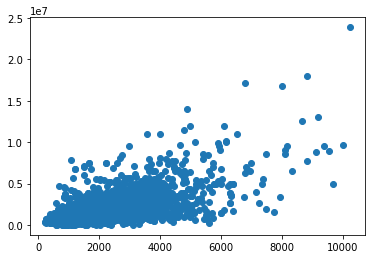

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


R2: 	 0.4927482150686453
MSE: 	 0.3390224246997096
MAE: 	 0.3963788365619881
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.2min finished


R2: 	 0.5476855634695915
MSE: 	 0.30230497270694434
MAE: 	 0.33769041087058826


In [4]:
# read data
housing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data-cleaning/data.csv")

# drop suspicious data
housing = housing.drop([1618]) \
    .drop([3405]).drop([10652]).drop([954]).drop([11136]) \
    .drop([5103]).drop([916]).drop([10967]).drop([7383]) \
    .drop([1465]).drop([8967]) \
    .drop([8300]).drop([4997])

# print changes
x = housing['finishedsqft']
y = housing['lastsoldprice']
plt.scatter(x, y)
plt.show()

# create copy of data
housing_copy = housing.copy()

housing = drop_columns(housing)

# create one-hot encoding for neighborhood column for model training
one_hot = pd.get_dummies(housing['neighborhood'])
housing = housing.drop('neighborhood', axis=1)

# standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(housing)
housing[housing.columns] = scaler.transform(housing[housing.columns])

# add to standardized data one-hot encoded feature
housing = housing.join(one_hot)

# split
x_train, x_test, y_train, y_test = split_data(housing)
housing_split = (x_train, x_test, y_train, y_test)
# housing_split = (split_data(housing))

# train
train(LinearRegression(), {}, *housing_split)
forest_params = {'n_estimators': [1000], 'max_depth': [None], 'min_samples_split': [2]}
train(RandomForestRegressor(), forest_params, *housing_split)